# Numpy

## Introduction to Numpy

The core data structure in NumPy, the **ndarray** or n-dimensional array.

In programming, an array describes a collection of elements, similar to a list. The word n-dimensional refers to the fact that ndarrays can have one or more dimensions.

In [ ]:
import numpy as np

To create a 1D ndarray by directly converting a list to an ndarray using the `numpy.array()` constructor.

In [ ]:
np_array = np.array([1,3,5])
type(np_array)

numpy.ndarray

### Vectorization

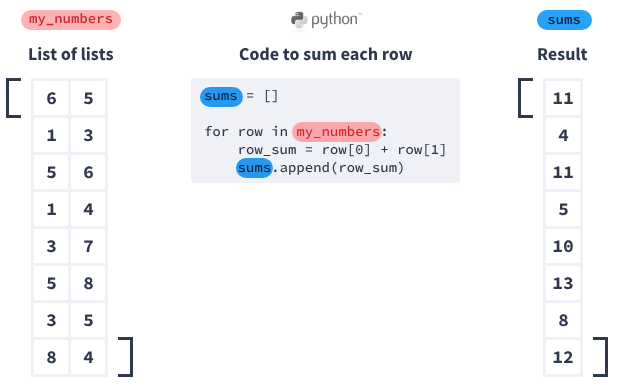

During each iteration, Python converts our code into bytecode, which instructs our computer's processor to add the numbers:

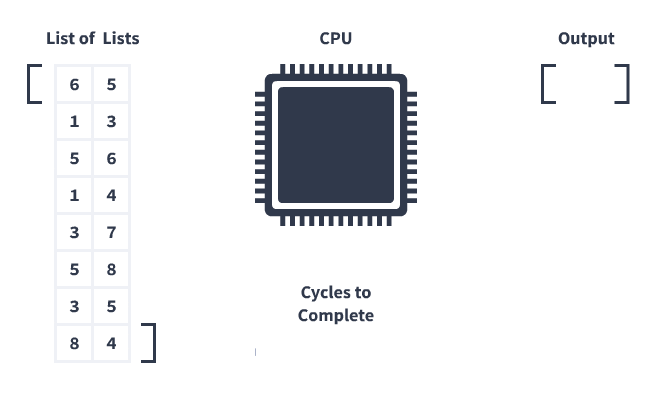

For our example, **the computer would need eight processor cycles to process the eight rows of data in list.**

The NumPy library, on the other hand, leverages a processor feature called **Single Instruction Multiple Data (SIMD)** for faster data processing. SIMD **enables a processor to execute the same operation on multiple data points in a single cycle.**

Consequently, NumPy requires only two processor cycles — **four times faster than standard Python**. This technique of replacing `for` loops with simultaneous operations on multiple data points is called **vectorization**, made possible by ndarrays.

**Note:** Vector calculation is always faster than individual dimension wise calculation.

In [ ]:
import numpy as np
import csv

# import nyc_taxi.csv as a list of lists

f = open('/content/nyc_taxis.csv','r')
taxi_list = list(csv.reader(f))

In [ ]:
f

<_io.TextIOWrapper name='/content/nyc_taxis.csv' mode='r' encoding='UTF-8'>

In [ ]:
len(taxi_list)

2014

In [ ]:
# remove the header row
taxi_list = taxi_list[1:]
len(taxi_list)

2013

In [ ]:
taxi_list[0]

['2016',
 '1',
 '1',
 '5',
 '0',
 '2',
 '4',
 '21.00',
 '2037',
 '52.00',
 '0.80',
 '5.54',
 '11.65',
 '69.99',
 '1']

In [ ]:
# converting all values to float

float_taxi_list = []
for row in taxi_list:
  temp = []
  for ele in row:
    temp.append(float(ele))
  float_taxi_list.append(temp)

In [ ]:
# converting a list of list into numpy array

taxi = np.array(float_taxi_list)

### Array Shapes

In [ ]:
taxi

array([[2.016e+03, 1.000e+00, 1.000e+00, ..., 1.165e+01, 6.999e+01,
        1.000e+00],
       [2.016e+03, 1.000e+00, 1.000e+00, ..., 8.000e+00, 5.430e+01,
        1.000e+00],
       [2.016e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 3.780e+01,
        2.000e+00],
       ...,
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 5.000e+00, 6.334e+01,
        1.000e+00],
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 8.950e+00, 4.475e+01,
        1.000e+00],
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 0.000e+00, 5.484e+01,
        2.000e+00]])

The ellipses (...) between rows and columns indicate that there is more data in our NumPy ndarray than can easily be printed.

However, it's often useful to know the dimensions (number of rows and columns) of an ndarray, which can be found using the `np.shape`

In [ ]:
taxi.shape

(2013, 15)

### Slicing Ndarrays

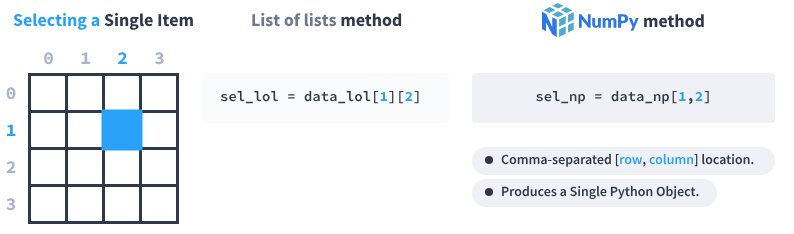

Notice the difference: when working with a list of lists, we use two separate pairs of square brackets back-to-back, whereas **with a NumPy ndarray, we use a single pair of brackets with comma-separated row and column locations.**

In [ ]:
taxi[21,5], taxi_list[21][5]

(4.0, '4')

### Column Slicing

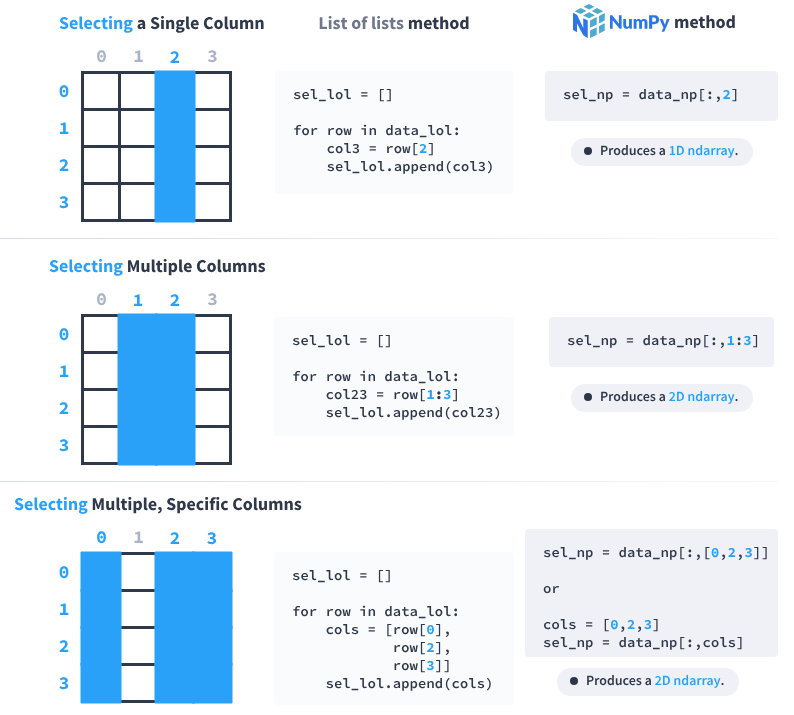

### Vector Operations

In this context, **ndarrays can also be called vectors.**

In [ ]:
fare_amount = taxi[:,9]
fees_amount = taxi[:,10]
fare_and_fees = fare_amount + fees_amount
print(fare_and_fees)

[52.8 46.3 37.8 ... 52.8 35.8 49.3]


Here are some of the basic arithmetic operations we can use with vectors:

1. `vector_a` + `vector_b` — addition
2. `vector_a` - `vector_b` — subtraction
3. `vector_a` * `vector_b` — multiplication
4. `vector_a` / `vector_b` — division

Note: The vectors must have same shape while these operations are performed.

In [ ]:
trip_distance_miles = taxi[:,7]
trip_length_seconds = taxi[:,8]
trip_length_hours = trip_length_seconds/3600
trip_mph = trip_distance_miles/trip_length_hours
print(trip_mph[:10])

[37.11340206 38.58157895 31.27222982 25.88429752 26.3715415  38.53293413
 32.81553398 35.95075239 51.00702576 33.20207254]


**NumPy broadcasting**:

In this case, we divided the entire trip_length_seconds vector by a single number (3600) instead of by another vector. When we divide a vector by single number like this, NumPy still performs an element-wise operation by automatically creating a new vector with the same shape as `trip_length_seconds` where each element is equal to 3600. In this way, NumPy is still performing an element-wise operation between two vectors with the same shape. This process of making the vectors the same shape for element-wise operations is referred to as NumPy broadcasting.

### Statistics Calculations

1. `ndarray.min()` to calculate the minimum value
2. `ndarray.max()` to calculate the maximum value
3. `ndarray.mean()` to calculate the mean or average value
4. `ndarray.sum()` to calculate the sum of the values

In [ ]:
trip_mph.min(), trip_mph.max(), trip_mph.mean()

(0.0, 82800.0, 169.98315083655157)

Using the `ndarray.max()` method without any additional parameters returns a single value like we saw with a 1D ndarray, representing the overall maximum:

In [ ]:
taxi.max()

85360.0

To find the maximum of each row, we set the `axis` parameter to 1 (for rows) and 0 (for columns):

In [ ]:
taxi.max(axis=1)

array([2037., 2016., 2016., ..., 2822., 2016., 2016.])

### Function vs Method

 **Functions** are standalone pieces of code that typically take an input, perform some processing, and return some output.

 **Methods** are special functions associated with a specific type of Python object (Ex: list). For example, the `list.append()` method adds an item to the end of a Python list. Since the `append()` method is defined for list objects but not for string objects, using this method on a string object results in an error.
 Example: `.shape` is a method associated with numpy arrays

In [ ]:
my_string = 'Dataquest'
my_string.append(' is the best!')

AttributeError: ignored

To remember:
1. Function calls usually start with the library name or its alias (e.g., `np.mean()`).
2. Method calls begin with an object or variable name from a particular class (e.g., `trip_mph.mean()`).

## Boolean indexing with Numpy

### `np.genfromtxt()`

`np.genfromtxt()` is a function to load a file directly into an ndarray

In [ ]:
import numpy as np

np.genfromtxt(filename, delimiter=None)

In [ ]:
import numpy as np
taxi = np.genfromtxt('/content/nyc_taxis.csv', delimiter=',')
taxi

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [2.016e+03, 1.000e+00, 1.000e+00, ..., 1.165e+01, 6.999e+01,
        1.000e+00],
       [2.016e+03, 1.000e+00, 1.000e+00, ..., 8.000e+00, 5.430e+01,
        1.000e+00],
       ...,
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 5.000e+00, 6.334e+01,
        1.000e+00],
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 8.950e+00, 4.475e+01,
        1.000e+00],
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 0.000e+00, 5.484e+01,
        2.000e+00]])

When we opened the file this way, we had to explicitly convert all the data to **float** values because ndarrays can only contain one data type. We didn't need this step in the previous exercise since `numpy.genfromtxt()`  automatically determines the data type by looking at the file's values.

In [ ]:
type(taxi)

numpy.ndarray

In [ ]:
taxi = np.genfromtxt('/content/nyc_taxis.csv', delimiter=',', skip_header=1)
taxi

array([[2.016e+03, 1.000e+00, 1.000e+00, ..., 1.165e+01, 6.999e+01,
        1.000e+00],
       [2.016e+03, 1.000e+00, 1.000e+00, ..., 8.000e+00, 5.430e+01,
        1.000e+00],
       [2.016e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 3.780e+01,
        2.000e+00],
       ...,
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 5.000e+00, 6.334e+01,
        1.000e+00],
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 8.950e+00, 4.475e+01,
        1.000e+00],
       [2.016e+03, 6.000e+00, 3.000e+01, ..., 0.000e+00, 5.484e+01,
        2.000e+00]])

### Boolean Arrays

A **Boolean array** is an array filled with Boolean values. We might also call them Boolean vectors or Boolean masks.

The Boolean (or bool) type is a built-in Python type that can have one of two unique values:

1. True
2. False

We often create Boolean arrays with Python **comparison operators**. The comparison operators in Python are:

1. == — equal to
2. '>' — greater than
3. '>=' — greater than or equal to
4. < — less than
5. <= — less than or equal to
6. != — not equal to


In [ ]:
print(type(3.5) == float)

True


**Vectorized Boolean Operations**

In [ ]:
print(np.array([2, 4, 6, 8]) + 10)

[12 14 16 18]


In [ ]:
print(np.array([2, 4, 6, 8]) < 5)

[ True  True False False]


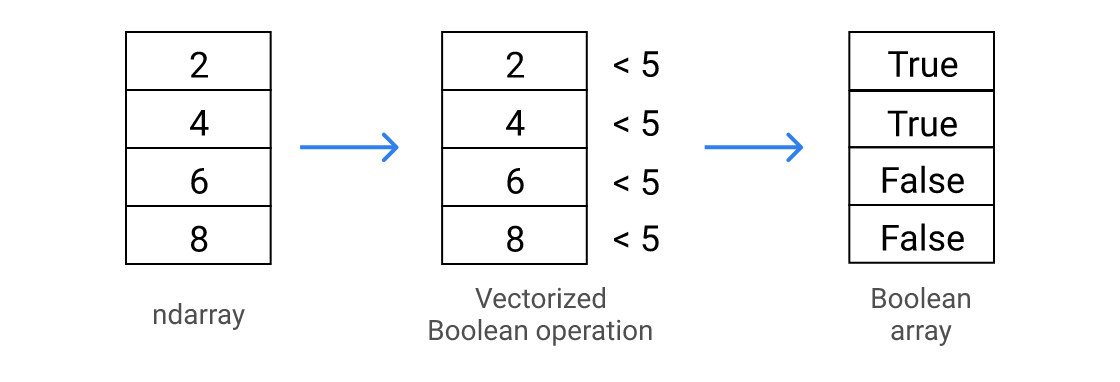

### Boolean Indexing

**Boolean Indexing with 1D Arrays**

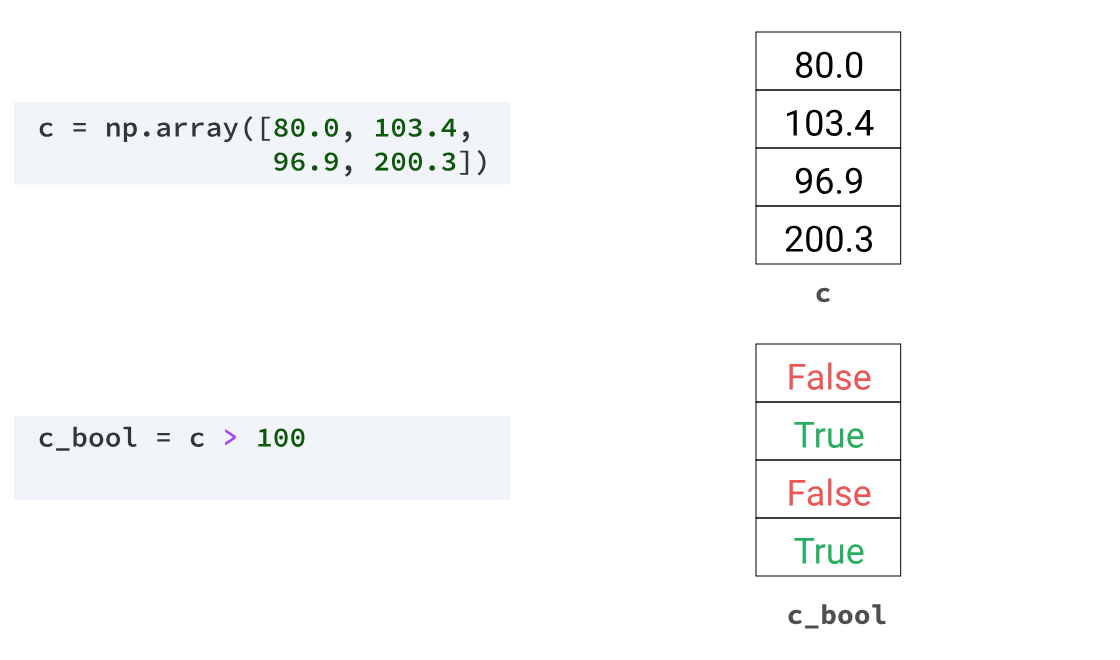

To use Boolean indexing, simply insert the Boolean array into the square brackets like we would with other selection techniques:

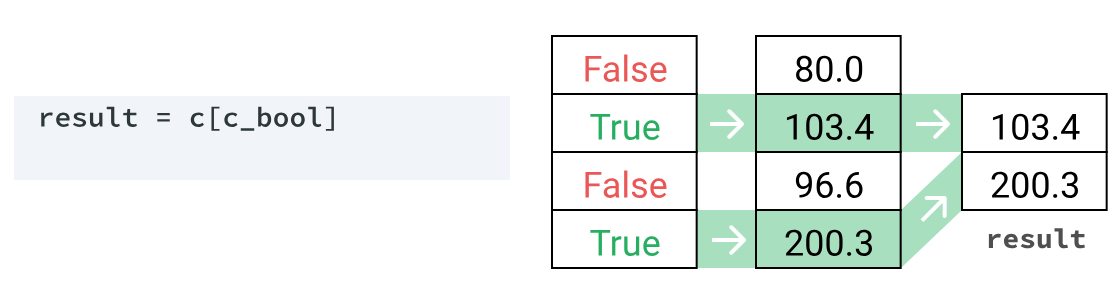

Think of the Boolean array as a filter: **True values make the cut, while False values are left behind.**

Example:

In [ ]:
pickup_month = taxi[:,1]
pickup_month

array([1., 1., 1., ..., 6., 6., 6.])

In [ ]:
jan_bool = pickup_month==1
jan_bool

array([ True,  True,  True, ..., False, False, False])

In [ ]:
jan_taxi = taxi[jan_bool]
jan_taxi.shape[0]

800

**Boolean Indexing with 2D Arrays**

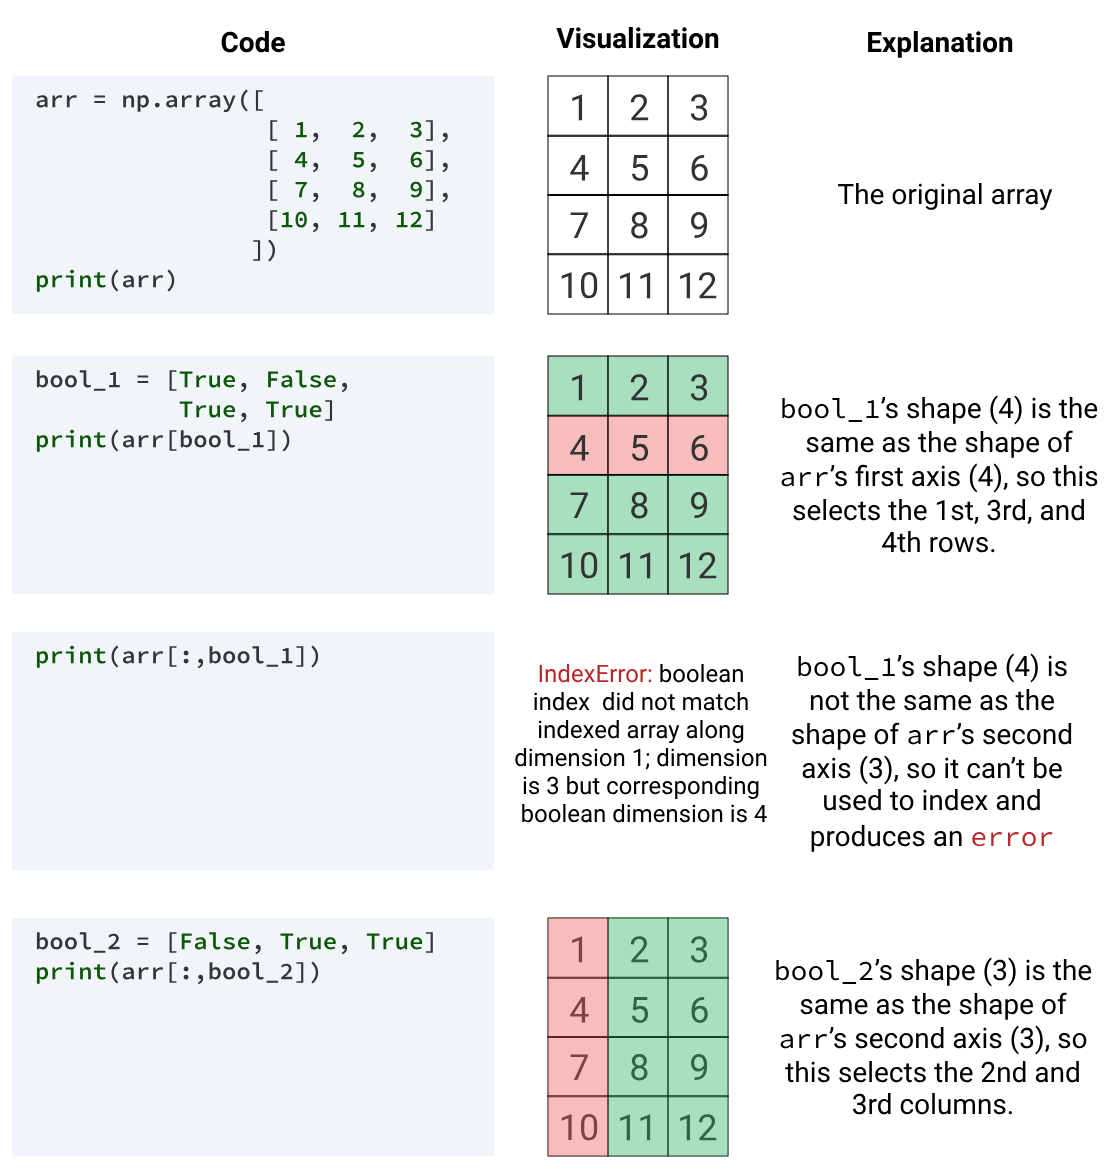

In [ ]:
# Calculate the average speed
trip_mph = taxi[:, 7] / (taxi[:, 8] / 3600)

In [ ]:
# Create a boolean array for trips with average
# speeds greater than 20,000 mph
trip_mph_bool = trip_mph > 20000

# Use the boolean array to select the rows for
# those trips, and the pickup_location_code,
# dropoff_location_code, trip_distance, and
# trip_length columns
trips_over_20000_mph = taxi[trip_mph_bool, 5:9]

print(trips_over_20000_mph)

[[ 2.   2.  23.   1. ]
 [ 2.   2.  19.6  1. ]
 [ 2.   2.  16.7  2. ]
 [ 3.   3.  17.8  2. ]
 [ 2.   2.  17.2  2. ]
 [ 3.   3.  16.9  3. ]
 [ 2.   2.  27.1  4. ]]


A quick glance at the last column (column index 9) reveals that most of these trips are very short rides — all have `trip_length` values of 4 seconds or fewer. However, this doesn't match the trip distances (column index 8), which are all more than 16 miles.

### Assigning Values

In [ ]:
a = np.array(['red', 'blue', 'black', 'blue', 'purple'])
a[0] = 'orange'
print(a)

['orange' 'blue' 'black' 'blue' 'purple']


Updating multiple values at once:

In [ ]:
a[3:] = 'pink'
print(a)

['orange' 'blue' 'black' 'pink' 'pink']


2D array:

In [ ]:
ones = np.array([[1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1]])
ones[1, 2] = 99
print(ones)

[[ 1  1  1  1  1]
 [ 1  1 99  1  1]
 [ 1  1  1  1  1]]


Updating an entire row:

In [ ]:
ones[0] = 42
print(ones)

[[42 42 42 42 42]
 [ 1  1 99  1  1]
 [ 1  1  1  1  1]]


Updating entire column:

In [ ]:
ones[:, 2] = 0
print(ones)

[[1 1 0 1 1]
 [1 1 0 1 1]
 [1 1 0 1 1]]


The Boolean array `a2_bool` acts like a filter, controlling which values are affected by the assignment operation. The other values remain unchanged, untouched by the transformation.

In [ ]:
a2 = np.array([1, 2, 3, 4, 5])

a2_bool = a2 > 2

a2[a2_bool] = 99

print(a2)

[ 1  2 99 99 99]


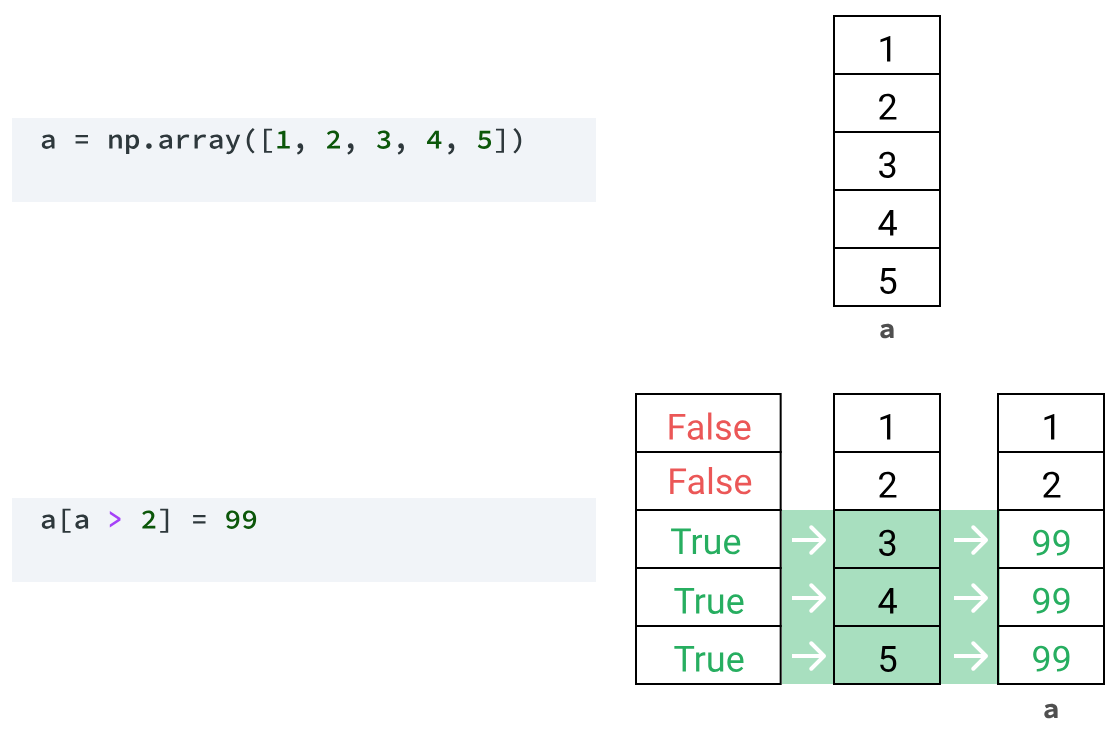

Boolean 2D arrays:

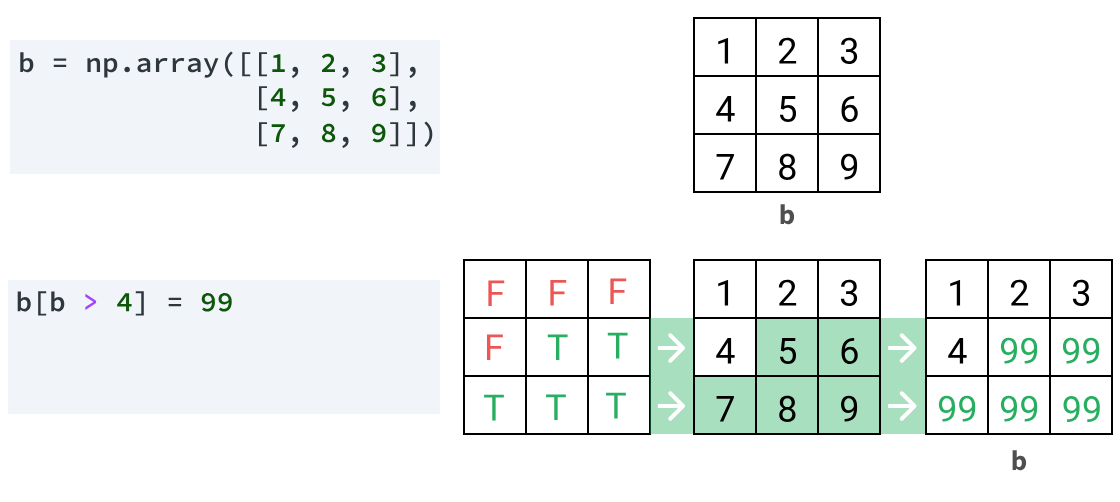

We can also use a 1D Boolean array to modify a 2D array:
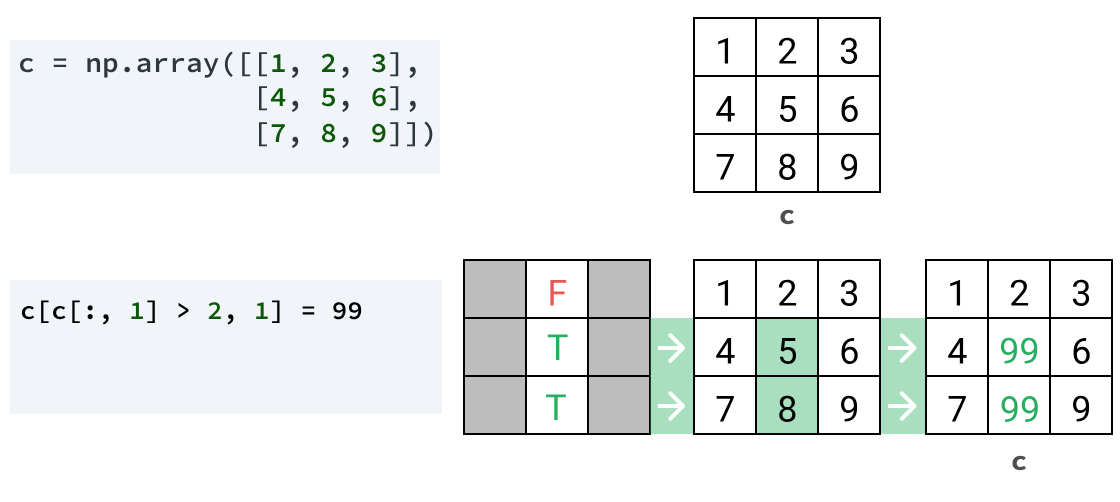

`c[:,1]` -> selecting all rows in column 1

`c[:,1] > 2` -> bool = True where value > 2 in this column

`c[c[:,1] > 2, 1]` -> filter and select 1st column and those rows in c which satisifies the boolean condition

# Pandas

## Introduction to Pandas

NumPy has its limitations:

1. It **doesn't support column names**, so we must frame questions as multi-dimensional array operations.
2. It only allows for **one data type per ndarray**, complicating the handling of mixed numeric and string data.

**Pandas is built upon Numpy**

In [ ]:
l = [1,'s',4.2]

In [ ]:
type(l[0])

int

In [ ]:
import numpy as np
a = np.array(l)
a

array(['1', 's', '4.2'], dtype='<U32')

In [ ]:
type(a[0])

numpy.str_

**DataFrames** are pandas' answer to NumPy's 2D ndarrays, but with enhancements:

1. Axis values can have string labels, not just numeric ones.
2. DataFrames can contain columns with multiple data types, including: integer, float, and string.

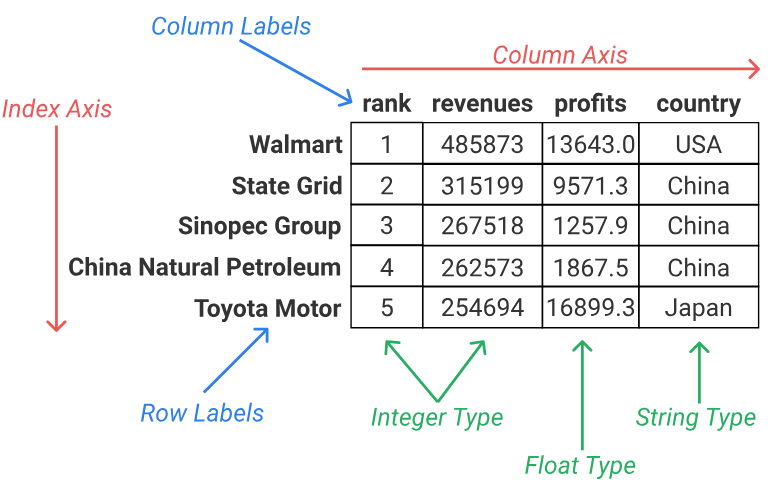

In [ ]:
import pandas as pd

f500 = pd.read_csv('/content/f500.csv', index_col=0)
f500.shape

(500, 16)

In [ ]:
f500_part = f500.head()

In [ ]:
f500_part.dtypes

rank                          int64
revenues                      int64
revenue_change              float64
profits                     float64
assets                        int64
profit_change               float64
ceo                          object
industry                     object
sector                       object
previous_rank                 int64
country                      object
hq_location                  object
website                      object
years_on_global_500_list      int64
employees                     int64
total_stockholder_equity      int64
dtype: object

`object` is used for columns containing data that doesn't fit into any other dtypes, typically for columns with string values.

`DataFrame.info()` prints the information automatically without having to make a call the `print()` function. In fact, it returns the Python `None` object so we can't assign the information to a variable like we have been doing.

### Selecting columns in df

In [ ]:
industries = f500['industry']
type(industries)

pandas.core.series.Series

When we selected just one column of our DataFrame, we were returned to a new pandas object: a `pandas.Series` object. Whenever we come across a **1D pandas** object, it's a **Series**. And when we see a **2D pandas** object, it's a **DataFrame**.

**Selecting multiple columns:**

In [ ]:
f500_part[['rank','industry']]

,rank,industry
company,,
Walmart,1,General Merchandisers
State Grid,2,Utilities
Sinopec Group,3,Petroleum Refining
China National Petroleum,4,Petroleum Refining
Toyota Motor,5,Motor Vehicles and Parts


In [ ]:
f500_part.loc[:,['rank','industry']]

,rank,industry
company,,
Walmart,1,General Merchandisers
State Grid,2,Utilities
Sinopec Group,3,Petroleum Refining
China National Petroleum,4,Petroleum Refining
Toyota Motor,5,Motor Vehicles and Parts


**Selecting a slice of columns:**

In [ ]:
f500_part.loc[:,'rank':'profits']

,rank,revenues,revenue_change,profits
company,,,,
Walmart,1,485873,0.8,13643.0
State Grid,2,315199,-4.4,9571.3
Sinopec Group,3,267518,-9.1,1257.9
China National Petroleum,4,262573,-12.3,1867.5
Toyota Motor,5,254694,7.7,16899.3


We get all the columns from the first column label up to and **including the last column label** in our slice.

### Selecting rows in df

In [ ]:
single_row = f500_part.loc["Sinopec Group"]
print(type(single_row))
print(single_row)

<class 'pandas.core.series.Series'>
rank                                             3
revenues                                    267518
revenue_change                                -9.1
profits                                     1257.9
assets                                      310726
profit_change                                -65.0
ceo                                      Wang Yupu
industry                        Petroleum Refining
sector                                      Energy
previous_rank                                    4
country                                      China
hq_location                         Beijing, China
website                     http://www.sinopec.com
years_on_global_500_list                        19
employees                                   713288
total_stockholder_equity                    106523
Name: Sinopec Group, dtype: object


In [ ]:
list_rows = f500_part.loc[["Toyota Motor", "Walmart"]] # ~ df.loc[["Toyota Motor", "Walmart"],:]
print(type(list_rows))
list_rows

<class 'pandas.core.frame.DataFrame'>


,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
company,,,,,,,,,,,,,,,,
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798


In [ ]:
slice_rows = f500_part["State Grid":"Toyota Motor"]
print(type(slice_rows))
print(slice_rows)

<class 'pandas.core.frame.DataFrame'>
                          rank  revenues  revenue_change  profits  assets  \
company                                                                     
State Grid                   2    315199            -4.4   9571.3  489838   
Sinopec Group                3    267518            -9.1   1257.9  310726   
China National Petroleum     4    262573           -12.3   1867.5  585619   
Toyota Motor                 5    254694             7.7  16899.3  437575   

                          profit_change            ceo  \
company                                                  
State Grid                         -6.2        Kou Wei   
Sinopec Group                     -65.0      Wang Yupu   
China National Petroleum          -73.7  Zhang Jianhua   
Toyota Motor                      -12.3    Akio Toyoda   

                                          industry                  sector  \
company                                                                 

### General Selections

In [ ]:
big_movers = f500.loc[['Aviva', 'HP', 'JD.com','BHP Billiton'],['rank','previous_rank']]

bottom_companies = f500.loc[['National Grid','AutoNation'],['rank','sector','country']]

revenue_giants = f500.loc[['Apple', 'Industrial & Commercial Bank of China', 'China Construction Bank', 'Agricultural Bank of China'],'revenues':'profit_change']

In [ ]:
big_movers

,rank,previous_rank
company,,
Aviva,90,279
HP,194,48
JD.com,261,366
BHP Billiton,350,168


In [ ]:
bottom_companies

,rank,sector,country
company,,,
National Grid,491,Energy,Britain
AutoNation,500,Retailing,USA


In [ ]:
revenue_giants

,revenues,revenue_change,profits,assets,profit_change
company,,,,,
Apple,215639,-7.7,45687.0,321686,-14.4
Industrial & Commercial Bank of China,147675,-11.7,41883.9,3473238,-5.0
China Construction Bank,135093,-8.7,34840.9,3016578,-4.0
Agricultural Bank of China,117275,-12.1,27687.8,2816039,-3.6


### `value_counts()`

In [ ]:
countries = f500['country']
country_counts = countries.value_counts()
print(country_counts)

USA             132
China           109
Japan            51
Germany          29
France           29
Britain          24
South Korea      15
Netherlands      14
Switzerland      14
Canada           11
Spain             9
Australia         7
Brazil            7
India             7
Italy             7
Taiwan            6
Russia            4
Ireland           4
Singapore         3
Sweden            3
Mexico            2
Malaysia          1
Thailand          1
Belgium           1
Norway            1
Luxembourg        1
Indonesia         1
Denmark           1
Saudi Arabia      1
Finland           1
Venezuela         1
Turkey            1
U.A.E             1
Israel            1
Name: country, dtype: int64


## Exploring Data with Pandas: Fundamentals

### Vectorized Operations

Since pandas is an extension of numpy, the vectorized operations can be performed for pandas `Series` too:

1. `series_a + series_b` - Addition
2. `series_a - series_b` - Subtraction
3. `series_a * series_b` - Multiplication (this is unrelated to the multiplications used in linear algebra).
4. `series_a / series_b` - Division

It also supports statistical calculations such as:

1. `Series.max()` and `DataFrame.max()`
2. `Series.min()` and `DataFrame.min()`
3. `Series.mean()` and `DataFrame.mean()`
4. `Series.median()` and `DataFrame.median()`
5. `Series.mode()` and `DataFrame.mode()`
6. `Series.sum()` and `DataFrame.sum()`

`Series.describe()`: This method tells us how many non-null values are contained in the series, along with the mean, minimum, maximum, and other statistics we'll learn about later in this path.

In [ ]:
f500.describe()

,rank,revenues,revenue_change,profits,assets,profit_change,previous_rank,years_on_global_500_list,employees,total_stockholder_equity
count,500.000000,500.000000,498.000000,499.000000,5.000000e+02,436.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,250.500000,55416.358000,4.538353,3055.203206,2.436323e+05,24.152752,222.134000,15.036000,1.339983e+05,30628.076000
std,144.481833,45725.478963,28.549067,5171.981071,4.851937e+05,437.509566,146.941961,7.932752,1.700878e+05,43642.576833
min,1.000000,21609.000000,-67.300000,-13038.000000,3.717000e+03,-793.700000,0.000000,1.000000,3.280000e+02,-59909.000000
25%,125.750000,29003.000000,-5.900000,556.950000,3.658850e+04,-22.775000,92.750000,7.000000,4.293250e+04,7553.750000
50%,250.500000,40236.000000,0.550000,1761.600000,7.326150e+04,-0.350000,219.500000,17.000000,9.291050e+04,15809.500000
75%,375.250000,63926.750000,6.975000,3954.000000,1.805640e+05,17.700000,347.250000,23.000000,1.689172e+05,37828.500000
max,500.000000,485873.000000,442.300000,45687.000000,3.473238e+06,8909.500000,500.000000,23.000000,2.300000e+06,301893.000000


**On a numerical column:**

In [ ]:
f500['assets'].describe()

count    5.000000e+02
mean     2.436323e+05
std      4.851937e+05
min      3.717000e+03
25%      3.658850e+04
50%      7.326150e+04
75%      1.805640e+05
max      3.473238e+06
Name: assets, dtype: float64

**On a categorical column:**

In [ ]:
f500["country"].describe()

count     500
unique     34
top       USA
freq      132
Name: country, dtype: object

For only categorical columns:

In [ ]:
describe = f500.describe(include=['O'])

### Method Chaining

**Method chaining** is a way to combine multiple methods together in a single line.

In [ ]:
country = f500['country']
country_count = country.value_counts()
china = country_count['China']
china

109

In [ ]:
f500["country"].value_counts()["China"]

109

In [ ]:
usa = f500[f500['country']=='USA']
industry_usa = usa['industry'].value_counts().head(2)
industry_usa

Banks: Commercial and Savings               8
Insurance: Property and Casualty (Stock)    7
Name: industry, dtype: int64

In [ ]:
china = f500[f500['country']=='China']
sector_china = china['sector'].value_counts().head(3)
sector_china

Financials     25
Energy         22
Wholesalers     9
Name: sector, dtype: int64

## Exploring Data with Pandas: Fundamentals

### `read_csv()`

In [ ]:
import pandas as pd

pd.read_csv('/content/f500.csv').head(3)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523


`index_col` parameter allows to choose which of column axis to use as the index axis.

In [ ]:
pd.read_csv('/content/f500.csv', index_col=0).head(3)

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
company,,,,,,,,,,,,,,,,
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523


`DataFrame.index` is used to access all the index values and `DataFrame.index.name` is used to call the name of the index axes.

In [ ]:
f500 = pd.read_csv('/content/f500.csv', index_col=0)
f500.index.name = None
f500.head(3)

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523


### `DataFrame.iloc[row_index,col_index]`

In [ ]:
f500 = pd.read_csv('/content/f500.csv')
f500.head(2)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456


To select the value in first row of the `company` column:

In [ ]:
f500.iloc[0,0]

'Walmart'

In [ ]:
# selecting a single column
f500.iloc[:,1]

0        1
1        2
2        3
3        4
4        5
      ... 
495    496
496    497
497    498
498    499
499    500
Name: rank, Length: 500, dtype: int64

In [ ]:
# selecting multiple column
f500.iloc[:,[0,1,2]]

,company,rank,revenues
0,Walmart,1,485873
1,State Grid,2,315199
2,Sinopec Group,3,267518
3,China National Petroleum,4,262573
4,Toyota Motor,5,254694
...,...,...,...
495,Teva Pharmaceutical Industries,496,21903
496,New China Life Insurance,497,21796
497,Wm. Morrison Supermarkets,498,21741
498,TUI,499,21655


In [ ]:
# selecting slices of column
f500.iloc[:,1:3]

,rank,revenues
0,1,485873
1,2,315199
2,3,267518
3,4,262573
4,5,254694
...,...,...
495,496,21903
496,497,21796
497,498,21741
498,499,21655


Notice that index3 is not included
1. With `loc[]`, the ending slice is included.
2. With `iloc[]`, the ending slice is not included.

In [ ]:
# selecting a row
f500.iloc[1]

company                                 State Grid
rank                                             2
revenues                                    315199
revenue_change                                -4.4
profits                                     9571.3
assets                                      489838
profit_change                                 -6.2
ceo                                        Kou Wei
industry                                 Utilities
sector                                      Energy
previous_rank                                    2
country                                      China
hq_location                         Beijing, China
website                     http://www.sgcc.com.cn
years_on_global_500_list                        17
employees                                   926067
total_stockholder_equity                    209456
Name: 1, dtype: object

In [ ]:
# selecting multiple row
f500.iloc[[1,3,7]]

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
7,Berkshire Hathaway,8,223604,6.1,24074.0,620854,NaN,Warren E. Buffett,Insurance: Property and Casualty (Stock),Financials,11,USA,"Omaha, NE",http://www.berkshirehathaway.com,21,367700,283001


In [ ]:
# selecting slices of row
f500.iloc[1:4]

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893


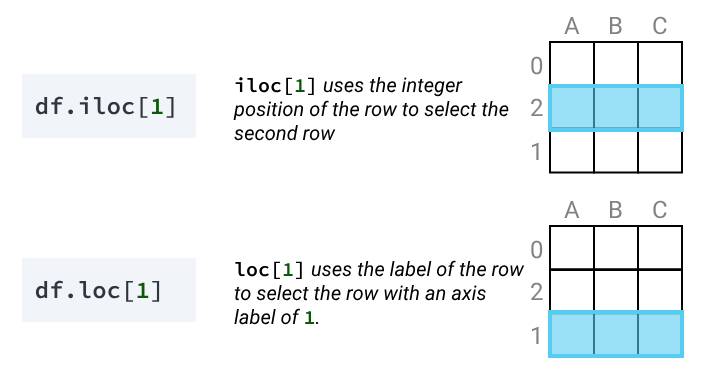

### Boolean masks - `isnull()`

In [ ]:
import numpy as np
f500.loc[f500['previous_rank']==0,'previous_rank']=np.nan

In [ ]:
null_prev = f500['previous_rank'].isnull()
null_previous_rank = f500.loc[null_prev,['company', 'rank', 'previous_rank']]
null_previous_rank.head(3)

,company,rank,previous_rank
48,Legal & General Group,49,NaN
90,Uniper,91,NaN
123,Dell Technologies,124,NaN


### Pandas Index Allignment

Another powerful aspect of pandas is that almost every operation will align on the index labels. Let's look at an example - below we have a dataframe named food and a series named `alt_name`:

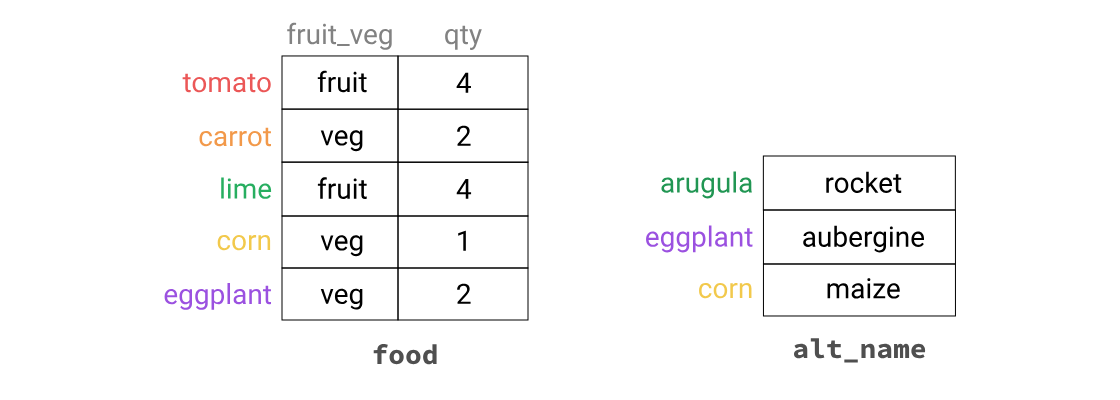

In [ ]:
food["alt_name"] = alt_name

When we do this, pandas will ignore the order of the `alt_name` series, and align on the index labels:

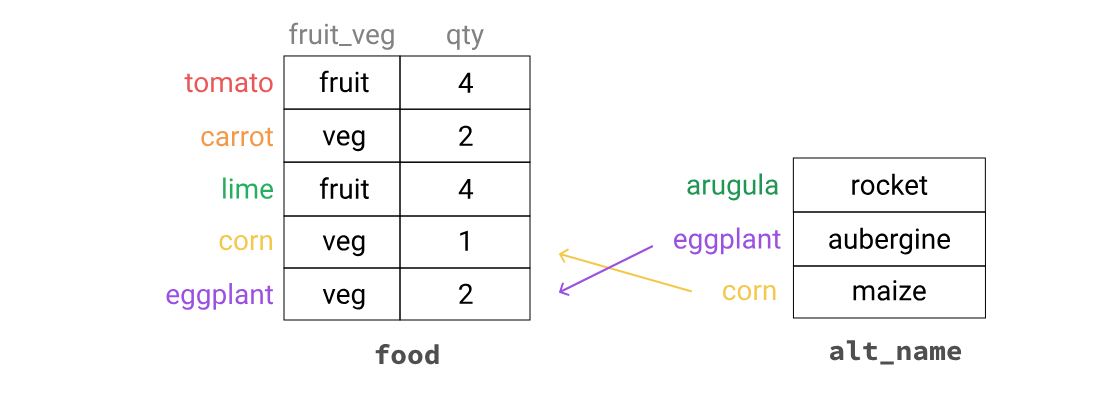

Pandas will also:

1. Discard any items that have an index that doesn't match the dataframe (like arugula).
2. Fill any remaining rows with NaN.

Below is the result:

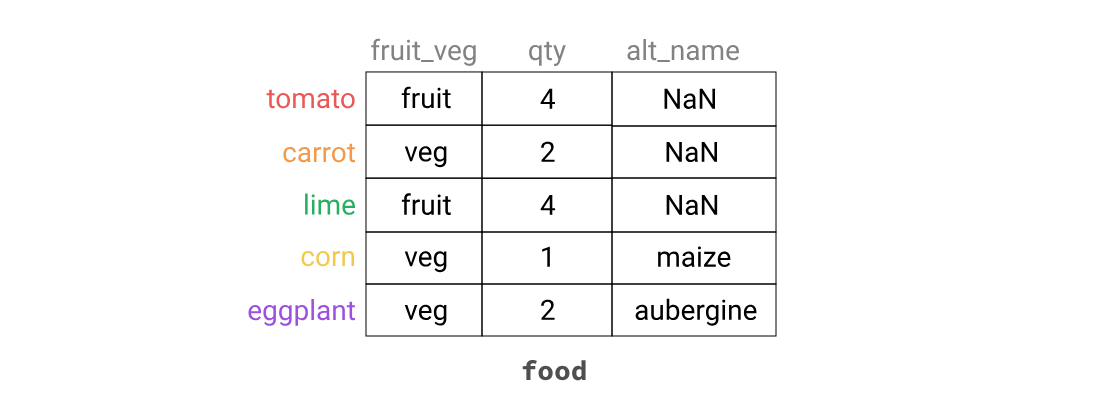

### Using boolean operators

We combine boolean arrays using boolean operators. In Python, these boolean operators are `and`, `or`, and `not`. In pandas, the operators are slightly different:

1. `and` -> `&`
2. `or` -> `|`
3. `not` -> `~`

In [ ]:
large_revenue = f500['revenues']>100000
negative_profits = f500['profits']<0
combined = large_revenue & negative_profits
big_rev_neg_profit = f500.loc[combined,['company','revenues','profits']]
big_rev_neg_profit

,company,revenues,profits
32,Japan Post Holdings,122990,-267.4
44,Chevron,107567,-497.0


**Example:** Select all rows for companies whose country value is either `Brazil` or `Venezuela`.

In [ ]:
f500[(f500['country']=='Brazil') | (f500['country']=='Venezuela')].head(3)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
74,Petrobras,75,81405,-16.3,-4838.0,246983,NaN,Pedro Pullen Parente,Petroleum Refining,Energy,58.0,Brazil,"Rio de Janeiro, Brazil",http://www.petrobras.com.br,23,68829,76779
112,Itau Unibanco Holding,113,66876,21.4,6666.4,415972,-13.7,Candido Botelho Bracher,Banks: Commercial and Savings,Financials,159.0,Brazil,"Sao Paulo, Brazil",http://www.itau.com.br,4,94779,37680
150,Banco do Brasil,151,58093,-13.4,2013.8,426416,-52.3,Paulo Rogerio Caffarelli,Banks: Commercial and Savings,Financials,115.0,Brazil,"Brasilia, Brazil",http://www.bb.com.br,23,100622,26551


**Example:** Selecting the first three companies in the `Technology` sector for which the country is not the USA from the `f500` dataframe.

In [ ]:
f500[(~(f500['country']=='USA'))&(f500['sector']=='Technology')].head(3)

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
14,Samsung Electronics,15,173957,-2.0,19316.5,217104,16.8,Oh-Hyun Kwon,"Electronics, Electrical Equip.",Technology,13.0,South Korea,"Suwon, South Korea",http://www.samsung.com,23,325000,154376
26,Hon Hai Precision Industry,27,135129,-4.3,4608.8,80436,-0.4,Terry Gou,"Electronics, Electrical Equip.",Technology,25.0,Taiwan,"New Taipei City, Taiwan",http://www.foxconn.com,13,726772,33476
70,Hitachi,71,84558,1.2,2134.3,86742,48.8,Toshiaki Higashihara,"Electronics, Electrical Equip.",Technology,79.0,Japan,"Tokyo, Japan",http://www.hitachi.com,23,303887,26632


### Sorting using `sort_values()`

**Syntax:** `DataFrame.sort_values(column_name, ascending=True)`

1. `column_name`: The column according to which the dataframe is to be sorted
2. `ascending`: `True` by default; set `ascending=False` to sort in descending order

**Example:** To find the company headquartered in Japan with the largest number of employees.

In [ ]:
jap_comp = f500[f500['country']=='Japan']
sorted_jap_comp = jap_comp.sort_values('employees', ascending=False)
top_japanese_employer = sorted_jap_comp.iloc[0]['company']
top_japanese_employer

'Toyota Motor'

### Aggregation: using loops

**Aggregation** is where we apply a statistical operation to groups of our data.

Let's say that we wanted to calculate the average revenue for each country in the data set. Our process might look like this:

1. Identify each unique country in the data set. (using `Series.unique()`)
2. For each country:
    a) Select only the rows corresponding to that country.
    b) Calculate the average revenue for those rows.

In [ ]:
# dictionary to save the results
avg_rev_by_country = {}

# unique countries in the dataset
countries = f500['country'].unique()

# looping through all the countries

for country in countries:
  c_df = f500[f500['country']==country]
  avg_rev = c_df['revenues'].mean()
  avg_rev_by_country[country]=avg_rev

avg_rev_by_country

{'USA': 64218.371212121216,
 'China': 55397.880733944956,
 'Japan': 53164.03921568627,
 'Germany': 63915.0,
 'Netherlands': 61708.92857142857,
 'Britain': 51588.708333333336,
 'South Korea': 49725.6,
 'Switzerland': 51353.57142857143,
 'France': 55231.793103448275,
 'Taiwan': 46364.666666666664,
 'Singapore': 54454.333333333336,
 'Italy': 51899.57142857143,
 'Russia': 65247.75,
 'Spain': 40600.666666666664,
 'Brazil': 52024.57142857143,
 'Mexico': 54987.5,
 'Luxembourg': 56791.0,
 'India': 39993.0,
 'Malaysia': 49479.0,
 'Thailand': 48719.0,
 'Australia': 33688.71428571428,
 'Belgium': 45905.0,
 'Norway': 45873.0,
 'Canada': 31848.0,
 'Ireland': 32819.5,
 'Indonesia': 36487.0,
 'Denmark': 35464.0,
 'Saudi Arabia': 35421.0,
 'Sweden': 27963.666666666668,
 'Finland': 26113.0,
 'Venezuela': 24403.0,
 'Turkey': 23456.0,
 'U.A.E': 22799.0,
 'Israel': 21903.0}

**Example:** To produce a dictionary of top employer in each country

In [ ]:
top_employer_by_country = {}
countries = f500['country'].unique()
for c in countries:
    c_df = f500[f500['country']==c]
    sorted_df = c_df.sort_values('employees', ascending=False)
    top_employer_by_country[c] = sorted_df.iloc[0]['company']

top_employer_by_country

{'USA': 'Walmart',
 'China': 'China National Petroleum',
 'Japan': 'Toyota Motor',
 'Germany': 'Volkswagen',
 'Netherlands': 'EXOR Group',
 'Britain': 'Compass Group',
 'South Korea': 'Samsung Electronics',
 'Switzerland': 'Nestle',
 'France': 'Sodexo',
 'Taiwan': 'Hon Hai Precision Industry',
 'Singapore': 'Flex',
 'Italy': 'Poste Italiane',
 'Russia': 'Gazprom',
 'Spain': 'Banco Santander',
 'Brazil': 'JBS',
 'Mexico': 'America Movil',
 'Luxembourg': 'ArcelorMittal',
 'India': 'State Bank of India',
 'Malaysia': 'Petronas',
 'Thailand': 'PTT',
 'Australia': 'Wesfarmers',
 'Belgium': 'Anheuser-Busch InBev',
 'Norway': 'Statoil',
 'Canada': 'George Weston',
 'Ireland': 'Accenture',
 'Indonesia': 'Pertamina',
 'Denmark': 'Maersk Group',
 'Saudi Arabia': 'SABIC',
 'Sweden': 'H & M Hennes & Mauritz',
 'Finland': 'Nokia',
 'Venezuela': 'Mercantil Servicios Financieros',
 'Turkey': 'Koc Holding',
 'U.A.E': 'Emirates Group',
 'Israel': 'Teva Pharmaceutical Industries'}

### Challenge: Calculating Return on Assets by Sector

Create a new column `roa` in the `f500` dataframe, containing the return on assets metric for each company. (roa = profit/assets)

Aggregate the data by the sector column, and create a dictionary `top_roa_by_sector`, with:
1. Dictionary keys with the sector name.
2. Dictionary values with the company name with the highest ROA value from that sector.

Note: ROA is a business-specific metric which indicates a company's ability to make profit using their available assets.

In [ ]:
f500['roa'] = f500['profits']/f500['assets']

top_roa_by_sector = {}
sectors = f500['sector'].unique()
for s in sectors:
    s_df = f500[f500['sector']==s]
    sorted_df = s_df.sort_values('roa', ascending=False)
    top_roa_by_sector[s] = sorted_df.iloc[0]['company']

top_roa_by_sector

{'Retailing': 'H & M Hennes & Mauritz',
 'Energy': 'National Grid',
 'Motor Vehicles & Parts': 'Subaru',
 'Financials': 'Berkshire Hathaway',
 'Technology': 'Accenture',
 'Wholesalers': 'McKesson',
 'Health Care': 'Gilead Sciences',
 'Telecommunications': 'KDDI',
 'Engineering & Construction': 'Pacific Construction Group',
 'Industrials': '3M',
 'Food & Drug Stores': 'Publix Super Markets',
 'Aerospace & Defense': 'Lockheed Martin',
 'Food, Beverages & Tobacco': 'Philip Morris International',
 'Household Products': 'Unilever',
 'Transportation': 'Delta Air Lines',
 'Materials': 'CRH',
 'Chemicals': 'LyondellBasell Industries',
 'Media': 'Disney',
 'Apparel': 'Nike',
 'Hotels, Restaurants & Leisure': 'McDonald’s',
 'Business Services': 'Adecco Group'}

# Data Cleaning

In [ ]:
import pandas as pd
laptops = pd.read_csv('/content/laptops.csv')

UnicodeDecodeError: ignored

This error references `UTF-8`, which is a type of encoding. Computers, at their lowest levels, can only understand binary - `0` and `1`- and encodings are systems for representing characters in binary.

Something we can do if our file has an unknown encoding is to try the most common encodings:

1. `UTF-8`
2. `Latin-1` (also known as `ISO-8859-1`)
3. `Windows-1251`

The `pandas.read_csv()` function has an `encoding` argument we can use to specify an encoding:

In [ ]:
laptops = pd.read_csv('/content/laptops.csv', encoding='Latin-1')
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


### Cleaning column names

In [ ]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [ ]:
def clean_col(col):
    col = col.strip()                               # strip all whitespaces
    col = col.replace('Operating System','os')
    col = col.replace(' ','_')                      # replace whitespace with _
    col = col.replace('(','')                       # removing parantheses
    col = col.replace(')','')
    col = col.lower()                               # converting everything into lower case

    return col

new_columns = []

for col in laptops.columns:
    new_columns.append(clean_col(col))

laptops.columns = new_columns



### Converting categorical column to numerical

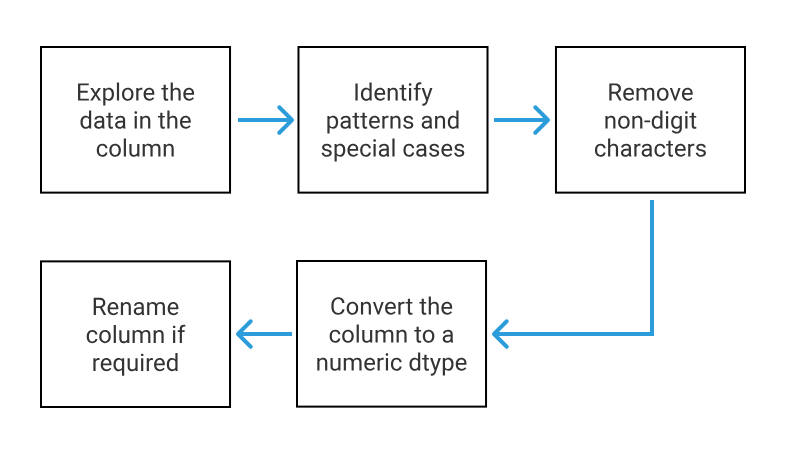

**Removing Non-digit characters**

`Series.str.replace()` is the equivalent of `str.replace()` for vectorized version.

In [ ]:
laptops['ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [ ]:
laptops['ram']=laptops['ram'].str.replace('GB','')
laptops['ram'].unique()

array(['8', '16', '4', '2', '12', '6', '32', '24', '64'], dtype=object)

**Typecasting**

`Series.astype()`

In [ ]:
laptops['ram'] = laptops['ram'].astype('int')
laptops['ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

**Renaming columns**

`Series.rename({old_name:new_name},axis)`

In [ ]:
laptops.rename({'ram':'ram_gb'}, axis=1, inplace=True)
laptops.head(3)

,manufacturer,model_name,category,screen_size,screen,cpu,ram_gb,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"


### Extracting values from string

`Series.str.split()`: applies `str.split()` for all rows of the Series

This method splits each string on the whitespace

In [ ]:
laptops["gpu"].head().str.split()

0    [Intel, Iris, Plus, Graphics, 640]
1           [Intel, HD, Graphics, 6000]
2            [Intel, HD, Graphics, 620]
3               [AMD, Radeon, Pro, 455]
4    [Intel, Iris, Plus, Graphics, 650]
Name: gpu, dtype: object

With series, we use the `str` accessor followed by `[]` (brackets):

In [ ]:
# manufacturer's name from gpu column
laptops["gpu"].head().str.split().str[0]

0    Intel
1    Intel
2    Intel
3      AMD
4    Intel
Name: gpu, dtype: object

In [ ]:
laptops["gpu"].head().str.split()[0]

['Intel', 'Iris', 'Plus', 'Graphics', '640']

### Correcting values with `Series.map()`

A dictionary is pass an argument to `Series.map()` to replace values.

If a value from your series doesn't exist as a key in your dictionary, it will convert that value to `NaN`.

In [ ]:
laptops['os'].value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: os, dtype: int64

In [ ]:
# correct value too is included so that NaN is not replaced for the correct entries (Ex: Android, Max OS, Linux)
mapping_dict = {
    'Android': 'Android',
    'Chrome OS': 'Chrome OS',
    'Linux': 'Linux',
    'Mac OS': 'macOS',
    'No OS': 'No OS',
    'Windows': 'Windows',
    'macOS': 'macOS'
}

laptops['os'] = laptops['os'].map(mapping_dict)

In [ ]:
laptops['os'].value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: os, dtype: int64

### Dealing with missing values

In [ ]:
laptops.shape

(1303, 13)

In [ ]:
laptops.isnull().sum()

manufacturer      0
model_name        0
category          0
screen_size       0
screen            0
cpu               0
ram_gb            0
storage           0
gpu               0
os                0
os_version      170
weight            0
price_euros       0
dtype: int64

In [ ]:
# axis=0 by default indicates along row
laptops.dropna().shape

(1133, 13)

In [ ]:
# axis = 1 indicates to remove NaN along column
laptops.dropna(axis=1).shape

(1303, 12)

### Challenge: Clean a string column

In [ ]:
laptops['weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: weight, Length: 179, dtype: int64

In [ ]:
# replacing 'kgs' and 'kg' with ''
laptops['weight'] = laptops['weight'].str.replace('kgs','')
laptops['weight'] = laptops['weight'].str.replace('kg','')

# converting string to float
laptops['weight'] = laptops['weight'].astype(float)

# renaming column name
laptops.rename({'weight':'weight_kg'}, axis=1, inplace=True)

# saving file with to_csv()
laptops.to_csv('laptops_cleaned.csv', index=False)

laptops.head(3)

,manufacturer,model_name,category,screen_size,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,"575,00"
